<center><h1> F1 Analysis - Why is Monaco a boring track and how did Verstappen beat Hamilton? ... </h1></center>

<br></br>

<div>
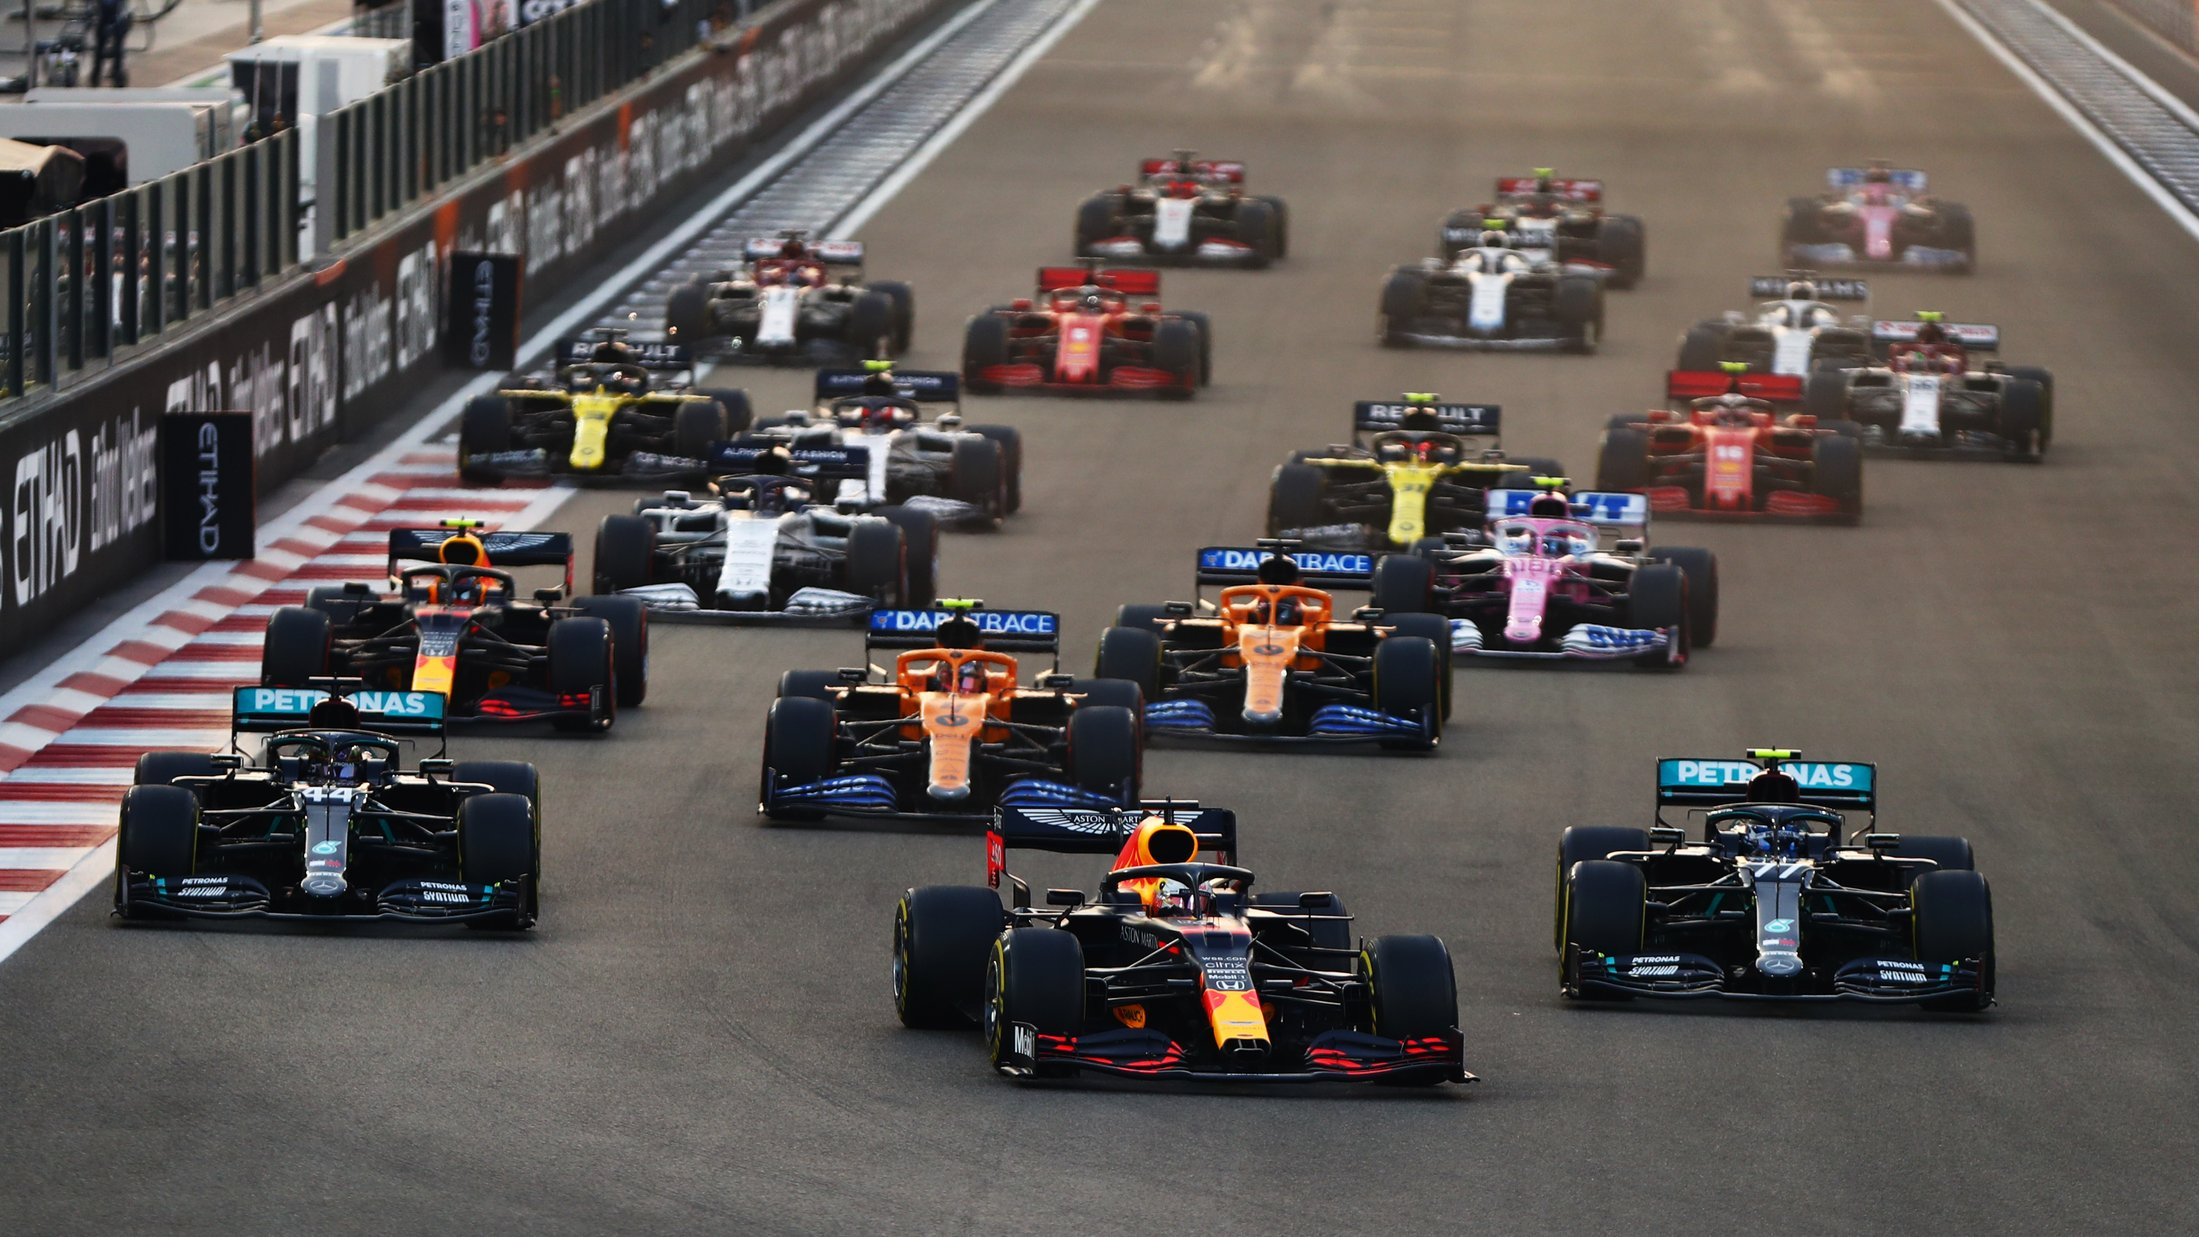
</div>
    
main aims:
- quantify what is a boring track based on overtakes
- this most crudely be change in position from quali
- then add in number of times per race that position changes
- then take into account people crashing out 
- startng in 2021 and then branching out to earlier seasons and seeing if tracks are consistently boring 


Would be good to explain why fastf1 wasn't used, but how in the end it would have been quite useful 

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from bs4 import BeautifulSoup
import requests 
from tqdm import tqdm 

In [2]:
# first we must find the raceId for the 2021 season races

df_races = pd.read_csv('data/races.csv')

df_2021 = df_races[df_races.year == 2021].sort_values(by='date')

df_2021

,raceId,year,round,circuitId,name,date,time,url
1037,1052,2021,1,3,Bahrain Grand Prix,2021-03-28,15:00:00,https://en.wikipedia.org/wiki/2021_Bahrain_Gra...
1035,1053,2021,2,21,Emilia Romagna Grand Prix,2021-04-18,13:00:00,http://en.wikipedia.org/wiki/2021_Emilia_Romag...
1039,1054,2021,3,75,Portuguese Grand Prix,2021-05-02,14:00:00,http://en.wikipedia.org/wiki/2021_Portuguese_G...
1040,1055,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...
1041,1056,2021,5,6,Monaco Grand Prix,2021-05-23,13:00:00,http://en.wikipedia.org/wiki/2021_Monaco_Grand...
1042,1057,2021,6,73,Azerbaijan Grand Prix,2021-06-06,12:00:00,http://en.wikipedia.org/wiki/2021_Azerbaijan_G...
1044,1059,2021,7,34,French Grand Prix,2021-06-20,13:00:00,http://en.wikipedia.org/wiki/2021_French_Grand...
1043,1058,2021,8,70,Styrian Grand Prix,2021-06-27,13:00:00,http://en.wikipedia.org/wiki/2021_Styrian_Gran...
1045,1060,2021,9,70,Austrian Grand Prix,2021-07-04,13:00:00,http://en.wikipedia.org/wiki/2021_Austrian_Gra...
1046,1061,2021,10,9,British Grand Prix,2021-07-18,14:00:00,http://en.wikipedia.org/wiki/2021_British_Gran...


In [3]:
# lets first use the Qatar GP (random choice) which has raceId of 1053
# we need to import both qualifying and results to see the difference here 
# luckily these are both in the results.csv file

df_results = pd.read_csv('data/results.csv')

df_results_qatar = df_results[df_results.raceId == 1051]

df_results_qatar

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
25340,25346,1051,1,131,44,1,1,1,1,25.0,57,1:24:28.471,5068471,50,2,1:25.084,227.633,1
25341,25347,1051,830,9,33,7,2,2,2,19.0,57,+25.743,5094214,57,1,1:23.196,232.799,1
25342,25348,1051,4,214,14,3,3,3,3,15.0,57,+59.457,5127928,48,10,1:26.682,223.437,1
25343,25349,1051,815,9,11,11,4,4,4,12.0,57,+1:02.306,5130777,49,3,1:25.613,226.227,1
25344,25350,1051,839,214,31,9,5,5,5,10.0,57,+1:20.570,5149041,46,13,1:27.061,222.464,1
25345,25351,1051,840,117,18,12,6,6,6,8.0,57,+1:21.274,5149745,44,17,1:27.356,221.713,1
25346,25352,1051,832,6,55,5,7,7,7,6.0,57,+1:21.911,5150382,46,9,1:26.570,223.726,1
25347,25353,1051,844,6,16,13,8,8,8,4.0,57,+1:23.126,5151597,46,8,1:26.555,223.765,1
25348,25354,1051,846,1,4,4,9,9,9,2.0,56,\N,\N,51,4,1:25.746,225.876,11
25349,25355,1051,20,117,5,10,10,10,10,1.0,56,\N,\N,53,7,1:26.434,224.078,11


In [4]:
# first lets see the difference in position for Hamilton with driverId 1, who started pole 

driverId = 1

grid = df_results_qatar.loc[df_results_qatar['driverId']==1]['grid']
finish = df_results_qatar.loc[df_results_qatar['driverId']==1]['position']

# here we can see that Hamilton finished at the same position as he started one the grid
int(grid) - int(finish)

0

The first, and most crude metric I am going to use is summing the squares of the difference between the start and finish position - dividing by the number of cars and then taking the square root gives the average deviation from the starting position. This can roughly describe how many overtakes and crashes there are (i.e. how exciting the track is). This is the standard deviation from the starting position instead of the mean.  

At first any car that retires will not be counted in the score, but this is something that I will look at later on 

In [5]:
# first we remove any cars who didn't finish the race - second backslash to ensure it is interpretted literally!
df_results_qatar = df_results_qatar.loc[df_results_qatar.position != '\\N']

deviation = 0 

for grid, finish in zip(df_results_qatar.grid, df_results_qatar.positionOrder): 
    deviation += (grid - finish)**2
    
deviation = math.sqrt(deviation/(len(df_results_qatar)-1))

# here we can see that the average car finishes 4.34 poisition DIFFERENT to its starting position...sounds reasonable
deviation

4.338609156373123

In [6]:
# if we are going to use the deviation a lot, we should make it into a function

def deviation(df: pd.DataFrame):
    
    n = 0 
    df = df.loc[df.position != '\\N']
    
    for grid, finish in zip(df.grid, df.positionOrder): 
        
        n += (grid - finish)**2
    
    n = math.sqrt(n/(len(df)-1))

    return n 

In [7]:
# as seen we get the same result with much less code!
deviation(df_results_qatar)

4.338609156373123

In [8]:
# now if we compare the score for Qatar with that for Monaco (raceId is 1056)
# remembering that we don't have to get rid of retirees as this is handled by the deviation function 


# as we see the score for Monaco is much less than Qatar which makes sense as it is a street track 
deviation(df_results[df_results.raceId == 1056])

2.6009048199334286

## Graphing the score of Monaco 2000-2021

In [9]:
# first need to get a list of the raceId's for the Monaco GP for last 20 years

df_races = pd.read_csv('data/races.csv')

# get races is ascending order for Monaco since 2000
df_monaco_races = df_races[df_races.name == 'Monaco Grand Prix'].loc[df_races.year > 1999].sort_values(by='year')

df_monaco_races

,raceId,year,round,circuitId,name,date,time,url
163,164,2000,7,6,Monaco Grand Prix,2000-06-04,\N,http://en.wikipedia.org/wiki/2000_Monaco_Grand...
146,147,2001,7,6,Monaco Grand Prix,2001-05-27,\N,http://en.wikipedia.org/wiki/2001_Monaco_Grand...
129,130,2002,7,6,Monaco Grand Prix,2002-05-26,\N,http://en.wikipedia.org/wiki/2002_Monaco_Grand...
113,114,2003,7,6,Monaco Grand Prix,2003-06-01,\N,http://en.wikipedia.org/wiki/2003_Monaco_Grand...
94,95,2004,6,6,Monaco Grand Prix,2004-05-23,\N,http://en.wikipedia.org/wiki/2004_Monaco_Grand...
75,76,2005,6,6,Monaco Grand Prix,2005-05-22,14:00:00,http://en.wikipedia.org/wiki/2005_Monaco_Grand...
58,59,2006,7,6,Monaco Grand Prix,2006-05-28,14:00:00,http://en.wikipedia.org/wiki/2006_Monaco_Grand...
39,40,2007,5,6,Monaco Grand Prix,2007-05-27,12:00:00,http://en.wikipedia.org/wiki/2007_Monaco_Grand...
22,23,2008,6,6,Monaco Grand Prix,2008-05-25,12:00:00,http://en.wikipedia.org/wiki/2008_Monaco_Grand...
5,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...


In [10]:
# we need to use a for loop to use the deviation function on each raceId

l = []

for raceId in df_monaco_races['raceId']:
    
    n = deviation(df_results[df_results.raceId == raceId])
    
    l.append(n)
    
# removing the 2022 element as this race is yet to happen!    
l = l[:-1]

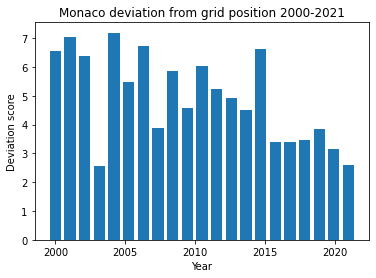

In [11]:
# we can now plot this data to see how Monaco has been throughout the last 20 years

x = np.linspace(2000,2021, 21)

# there is also 2020 missing due to COVID-19

# so it looks like Monaco has been getting less 'interesting' over the past few years
plt.bar(list(x), l)
plt.title('Monaco deviation from grid position 2000-2021')
plt.xlabel('Year')
plt.ylabel('Deviation score');

In [12]:
# we could add more analysis to try and explain this... what were the conditions on the day?

In [13]:
# if we have a look at the especially low results in 2003...

# we can see that the low result comes from the fact that the retirees were from low grid position
# this meant their retirement would change the position of someone higher up 
df_results[df_results.raceId == int(df_monaco_races[df_monaco_races.year == 2003].raceId)]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
1994,1995,114,31,3,3,3,1,1,1,10.0,78,1:42:19.010,6139010,\N,\N,\N,\N,1
1995,1996,114,8,1,6,2,2,2,2,8.0,78,+0.602,6139612,\N,\N,\N,\N,1
1996,1997,114,30,6,1,5,3,3,3,6.0,78,+1.720,6140730,\N,\N,\N,\N,1
1997,1998,114,23,3,4,1,4,4,4,5.0,78,+28.518,6167528,\N,\N,\N,\N,1
1998,1999,114,4,4,8,8,5,5,5,4.0,78,+36.251,6175261,\N,\N,\N,\N,1
1999,2000,114,15,4,7,4,6,6,6,3.0,78,+40.972,6179982,\N,\N,\N,\N,1
2000,2001,114,14,1,5,6,7,7,7,2.0,78,+41.227,6180237,\N,\N,\N,\N,1
2001,2002,114,22,6,2,7,8,8,8,1.0,78,+53.266,6192276,\N,\N,\N,\N,1
2002,2003,114,43,7,21,10,9,9,9,0.0,77,\N,\N,\N,\N,\N,\N,11
2003,2004,114,21,17,11,12,10,10,10,0.0,77,\N,\N,\N,\N,\N,\N,11


In [14]:
# in the future it would be good to have weather data correlating - currently don't have weather anywhere (w/ out too much effort)

r0 = requests.get('https://en.wikipedia.org/wiki/2018_Monaco_Grand_Prix')

soup = BeautifulSoup(r0.text)

In [15]:
# we can scrape wikipedia for the weather
r1 = requests.get('https://en.wikipedia.org/w/api.php?action=query&format=json&prop=revisions&titles=2021_Monaco_Grand_Prix&formatversion=2&rvprop=content&rvslots=*')

#r1.json()

In [16]:
# season progression points 
# for how long was Max ahead 
# momentum x race rolling average
# would old points system have made a difference

# Looking at 2021 drivers championship Max vs. Lewis

First we will look at the comulative scores and then can see momentum etc. Also under an old socring system would Max have still won?

In [17]:
df_drivers = pd.read_csv('data/drivers.csv')

# filtering by names in the drivers table we can find the driverId (1 and 830)
df_drivers.loc[(df_drivers.surname == 'Hamilton') | (df_drivers.surname == 'Verstappen')]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
49,50,verstappen,\N,\N,Jos,Verstappen,1972-03-04,Dutch,http://en.wikipedia.org/wiki/Jos_Verstappen
708,708,duncan_hamilton,\N,\N,Duncan,Hamilton,1920-04-30,British,http://en.wikipedia.org/wiki/Duncan_Hamilton_(...
829,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen


In [18]:
df_championship = pd.read_csv('data/driver_standings.csv')

df_championship

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33389,70776,1074,840,0.0,16,-,0
33390,70777,1074,852,0.0,17,-,0
33391,70778,1074,830,0.0,18,-,0
33392,70779,1074,20,0.0,19,-,0


This data gives us the number of wins and the position in the drivers championship we could check the points for a given driverId and raceId to get the number of points per race. 

Another method could be to manually add the scores together using their poistion in each race - this would allow us easily to compare how different scoring systems would have changed things 

In [19]:
df_championship.loc[(df_championship.driverId == 1) & (df_championship.raceId == 1073)]

,driverStandingsId,raceId,driverId,points,position,positionText,wins
33353,70740,1073,1,387.5,2,2,8


In [20]:
# or we could write a function which creates a cumulative score given a scoring system 

scores = [25,18,15,12,10,8,6,4,2,1]

# lets find lewis' score for the first race of 2021 
raceId = 164
tot_points = 0

# this is an example of how we find the position in a given race
df_results[(df_results.raceId == 1052) & (df_results.driverId == 1)]['positionOrder'].values

array([1])

In [21]:
scores = [25,18,15,12,10,8,6,4,2,1]

# maybe make the year here a param. 

def cum_score(driverId: int, df: pd.DataFrame, scores: list = scores) -> list:

    tot_points = 0 
    cum_points = []
    positions = []
    points = []
    
    for raceId in df_2021[df_2021.year == 2021].sort_values(by='date')['raceId']:
    
        position = df[(df.raceId == raceId) & (df.driverId == driverId)]['positionOrder'].values[0]
    
        if position < 11:

            tot_points += scores[position-1]
            points.append(scores[position-1])
            
        else:
            points.append(0)
            
            
        cum_points.append(tot_points)
        
        
    
    return cum_points, points

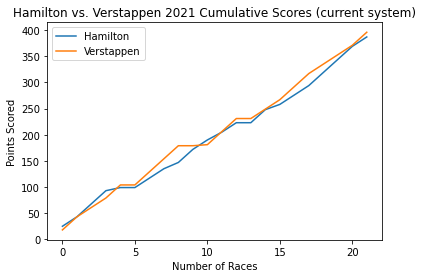

In [22]:
x = np.arange(22)
hamilton, _ = cum_score(1, df_results, scores)
verstappen, _ = cum_score(830, df_results, scores)

plt.plot(x, hamilton, label='Hamilton')
plt.plot(x, verstappen, label='Verstappen')
plt.title('Hamilton vs. Verstappen 2021 Cumulative Scores (current system)')
plt.xlabel('Number of Races')
plt.ylabel('Points Scored')

plt.legend()
plt.show()

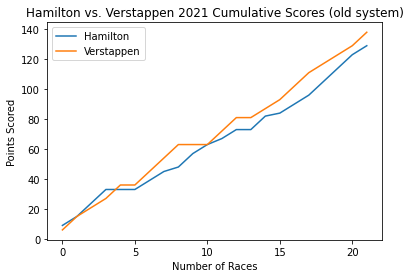

In [23]:
# if we use the points system up until 1990 Verstappen would have won the chamiponship even more comvincingly 

scores_old = [9,6,4,3,2,1,0,0,0,0]
hamilton_old, _ = cum_score(1, df_results, scores_old)
verstappen_old, _ = cum_score(830, df_results, scores_old)

plt.plot(x, hamilton_old, label='Hamilton')
plt.plot(x, verstappen_old, label='Verstappen')

plt.title('Hamilton vs. Verstappen 2021 Cumulative Scores (old system)')
plt.xlabel('Number of Races')
plt.ylabel('Points Scored')

plt.legend()
plt.show()

Now lets look at momentum we can define momentum as the rolling average points from the last x races. For this analysis we will use 3 as it is big enough to identify form but bot so big that it is very similar to the overall season

In [24]:
def points_rolling_average(driverId: str, average_over_x: int, df: pd.DataFrame, scores: list = scores) -> list:
    
    # for an x race season there will be x - 2 cumulative scores e.g. for 21 races [1,2,3] to [19,20,21]
    raceIds = df[df.year == 2021].sort_values(by='date')['raceId']
    length   = len(raceIds - 2)
    average_list = []    
    _, points = cum_score(driverId, df_results, scores)
    
    for i in range(2, length - 1):
        
        ave = (points[i-1] + points[i] + points[i+1]) / average_over_x
        
        average_list.append(ave)
        
    return average_list

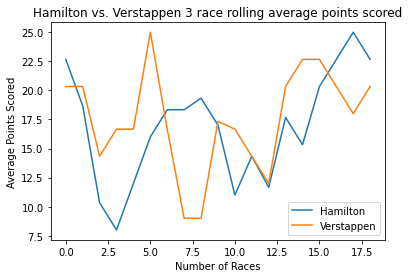

In [25]:
ham_3_ave = points_rolling_average(1, 3, df_races, scores)
ver_3_ave = points_rolling_average(830, 3, df_races, scores)

plt.plot(ham_3_ave, label='Hamilton')
plt.plot(ver_3_ave, label='Verstappen')

plt.title('Hamilton vs. Verstappen 3 race rolling average points scored')
plt.xlabel('Number of Races')
plt.ylabel('Average Points Scored')


#  this show that this was a super interesting season with both drivers having periods of good and bad form
plt.legend()
plt.show()

In [26]:
# is there a way here to find out whether either max or lewis are noticably better on harder to overtake track 

# Bringing together the track excitement factor and Max-Lewis battle

is there a way here to find out whether either max or lewis are noticably better on harder to overtake track. We can use cum_score function to get an array of the points and can map this against the track overtake number (could even average this number over the past 10 years.


In [27]:
_, points_hamilton = cum_score(1, df_results, scores)
_, points_verstappen = cum_score(830, df_results, scores)

<BarContainer object of 21 artists>

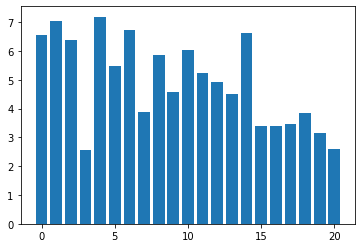

In [28]:
plt.bar(np.arange(21), l)

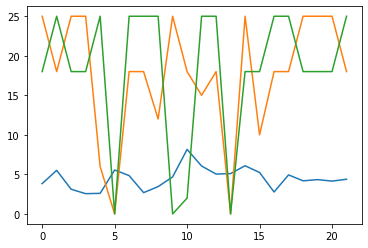

In [29]:
deviation_scores_2021 = []

for raceId in df_2021['raceId']:
    
    deviation_scores_2021.append(deviation(df_results[df_results.raceId == raceId]))
    
plt.plot(deviation_scores_2021)
plt.plot(points_hamilton)
plt.plot(points_verstappen)

# unfortunately there doesn't see to be a huge pattern
plt.show();

# Laps spent in each position

Here we will look at the number of laps each driver spent in each position during the 2021 season and see how this matches up with the drivers championship

The method for doing this is as follows: 

- access the lap_times.csv file 
- access the driverIds for 2021 race (where all main drivers were driving, Monaco) 
- create a list of tuples containing the driver and the position for a lap
- create 20x20 matrix which allows the number of laps in each position to be plotted for each driver 


In [47]:
df_laps = pd.read_csv('data/lap_times.csv')
driverIds = df_results[df_results.raceId == 1056]['driverId'].values

# this gives a list of [driverId, position]
positions = df_laps[(df_laps.raceId == raceId)][['driverId','position']].values


# first assume that the drivers are the same all season (although not true, think Russell when Hamilton had COVID)
position_mat = np.zeros((20,20))


for raceId in tqdm(df_2021['raceId'].values):

    positions = df_laps[(df_laps.raceId == raceId)][['driverId','position']].values
    
    for position in positions:
        
        try:
            position_mat[np.where(driverIds == position[0])[0][0]][position[1] - 1] += 1
            
        except IndexError:
            pass

    
position_mat 

100%|███████████████████████████████████████████| 22/22 [00:00<00:00, 91.87it/s]


array([[ 12.,  48.,  97.,  82., 121., 356., 141., 175., 103.,  51.,  52.,
         11.,  26.,  11.,   6.,   1.,   1.,   0.,   0.,   0.],
       [652., 330.,  95.,  13.,   4.,  10.,  12.,   4.,   8.,  18.,  27.,
         28.,   3.,   2.,   2.,   2.,   1.,   0.,   0.,   0.],
       [ 31.,  80., 146., 149., 183.,  58., 108., 101.,  97., 120.,  36.,
         14.,  44.,  21.,  19.,   3.,   4.,   0.,   0.,   9.],
       [ 46.,  68., 244., 336., 116.,  78.,  59.,  63.,  30.,  28.,  17.,
         36.,  16.,  11.,   7.,   7.,   3.,   8.,  12.,   1.],
       [  4.,  68.,  12.,  10.,  67.,  22., 109.,  51.,  58., 101., 135.,
        125., 142., 116.,  70.,  44.,  80.,  31.,  18.,   0.],
       [  0.,   0.,   4., 142., 120., 223.,  85.,  80.,  97.,  41.,  83.,
         62.,  37.,  40.,  22.,  35.,  13.,  20.,  20.,   2.],
       [297., 527., 137.,  89.,  70.,  49.,  58.,  10.,  12.,   1.,   4.,
          1.,   7.,   5.,   0.,   2.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  22.,   7.,  55

In [48]:
# now it would be useful to graph this and to match up with names

In [62]:
# we can now compare Max and Lewis if they scored points each lap using the same scoring system 

ham = zip(scores, position_mat[6])
ver = zip(scores, position_mat[1])

ham_tot = 0 
ver_tot = 0 

for i in ham: 
    
    ham_tot += i[0] * i[1]
    
for j in ver:
    
    ver_tot += j[0] * j[1]
    
# if points were calculated per lap Verstappen would have a 10% points lead 
(ver_tot - ham_tot)/ver_tot

0.10489132693346631

In [64]:
# using the normal points system Verstappen only had 2% lead
(verstappen[-1] - hamilton[-1])/verstappen[-1]

0.022727272727272728

What this shows us is that yet again, as much as the situation may have been unfair in Abu Dhabi Verstappen was the dominant, consistently high up driver... or is Lewis a man of supreme tactics?!

In [ ]:
# how else to compare 
# create a correlation matrix for this
# what is a prediction that i can set 